# Proyecto Data Analytics S&P500

- Analisis exploratorio de datos.

In [215]:
# Importando librerias necesarias y carga de dataset.

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
from pandas.plotting import scatter_matrix
import plotly.express as px

In [79]:
# Primero cargo dataset del indice SP500
start = '2000-01-01'
end = date.today()
sp_data = yf.download('^GSPC', start, end, interval= '1mo')

[*********************100%***********************]  1 of 1 completed


In [80]:
# Verifico Info del dataset
sp_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 278 entries, 2000-01-01 to 2023-02-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       278 non-null    float64
 1   High       278 non-null    float64
 2   Low        278 non-null    float64
 3   Close      278 non-null    float64
 4   Adj Close  278 non-null    float64
 5   Volume     278 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 15.2 KB


In [81]:
# Cuento las filas y columnas del dataset
sp_data.shape

(278, 6)

In [82]:
# Verifico el dataset

sp_data.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-01,1469.250000,1478.000000,1350.140015,1394.459961,1394.459961,21494400000
2000-02-01,1394.459961,1444.550049,1325.069946,1366.420044,1366.420044,20912000000
2000-03-01,1366.420044,1552.869995,1346.619995,1498.579956,1498.579956,26156200000


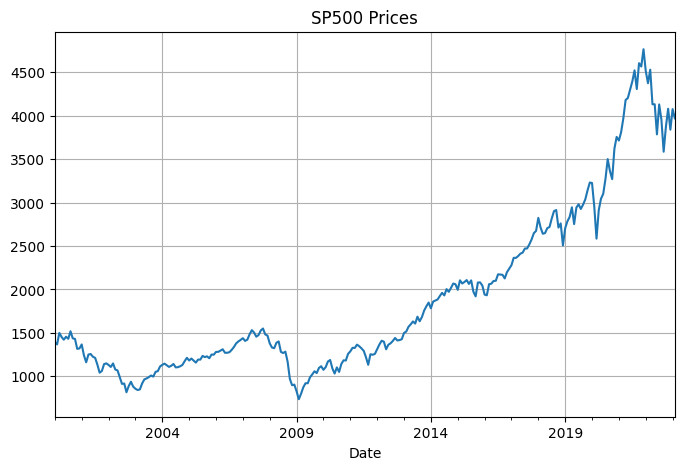

In [83]:
# Grafico del precio historico desde el 2000
sp_data['Adj Close'].plot(figsize= (8, 5))
plt.grid(alpha= 1)
plt.title('SP500 Prices')
plt.show()

La grafica anterior muestra la evolucion del precio del SP500 desde el 2000 hasta el 2022, a lo largo de los años el indice al igual que todo activo, ha sufrido sus bajos, en el año 2000 el activo sufrio una caida del 20% al reventar la burbuja puntocom, asi mismo en los años 2007, 2008 durante la crisis financiera global, la ultima caida significativa que sufrio el activo fue durante la pandemia del COVID19 en 2020. Se puede observar que el precio tiene un soporte por los 1000$ generado entre 2002 y 2010, tambien muestra un precio maximo por encima de los 4500$, a simple vista se puede observar que el precio sigue una tendencia alcista muy bien definida a partir del año 2010 luego de la crisis financiera global del 2008. Otra observacion interesante es que el 2020 (COVID19) el precio cae a los 2500$ aproximadamente y en 2021 - 2022 el precio recupera y llega a su actual precio maximo que ronda los 4700. Actualmente el precio se encuentra oscilando entre los 3500$ hasta los 4000$, testeando un suporte actualmente importante que podria definir la proxima direccion del precio.

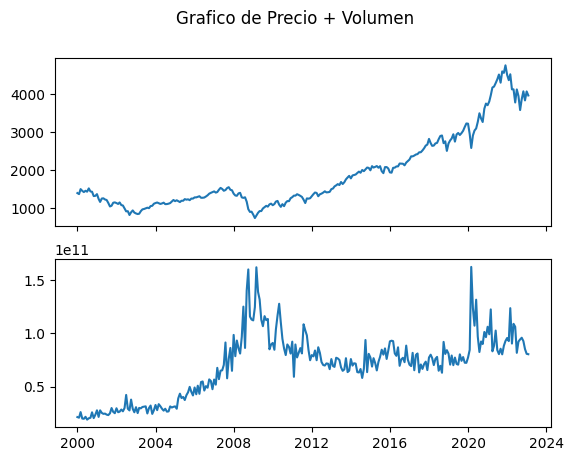

In [84]:
# Grafico de Volumen junto con la grafica historica del precio
fig, axs = plt.subplots(2, sharex= True)
fig.suptitle('Grafico de Precio + Volumen')
axs[0].plot(sp_data['Adj Close'])
axs[1].plot(sp_data.Volume)

Juntando la grafica de accion del precio con volumen, vemos un patron que se ha repetido dos veces y es que el volumen de negociacion aumenta antes de las subidas significativas del precio, esto quiere decir que los precios mas atractivos en el momento, fueron al rededor de los 900$ en 2009 y 2500$ en 2020. Tambien se puede observar que el volumenta esta regresando a niveles historicos entre 2012 y 2020.

<AxesSubplot: xlabel='Date'>

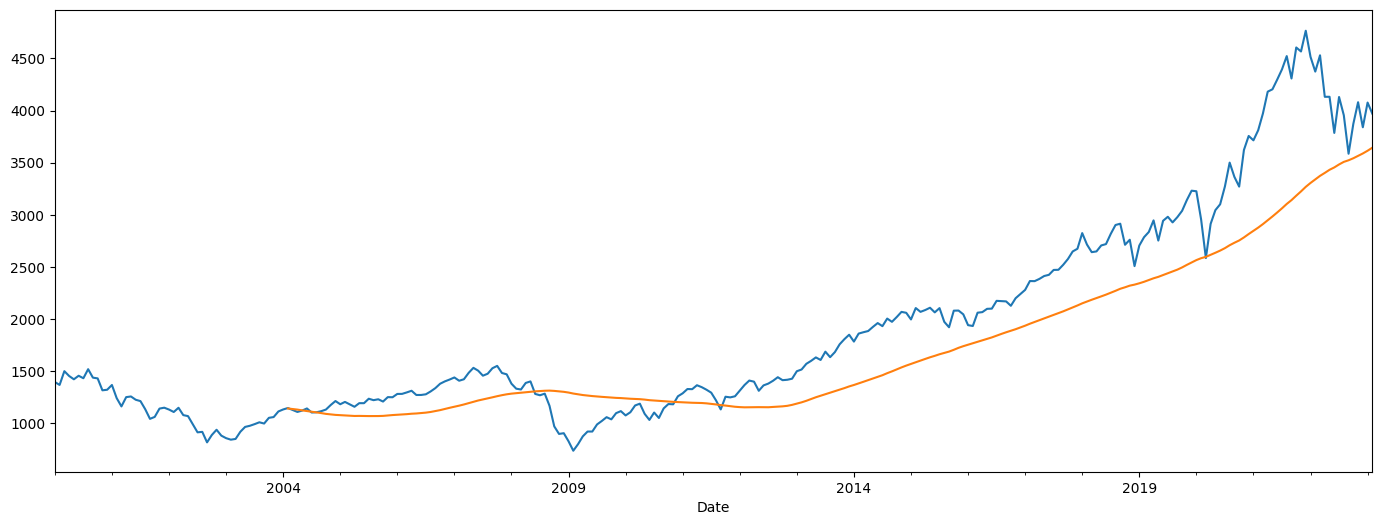

In [85]:
# Agregamos las medias moviles
sp_data['MA50'] = sp_data['Adj Close'].rolling(50).mean()
sp_data['Adj Close'].plot(figsize = (17,6))
sp_data['MA50'].plot()


Graficando la media movil, se ve claramente que desde 2010 el precio estuvo en una tendencia alcista, sin embargo en la actualidad el precio se encuentra visitando precio bajos oscilando entre 3500$ y 4000$ y se encuentra testeando el soporte de la media movil.

In [86]:
# Ahora calculare el rendimiento mensual del activo
# agregando columna de performance por share.

sp_data['share_perfomance'] = sp_data['Adj Close'].pct_change()
sp_data.head()

,Open,High,Low,Close,Adj Close,Volume,MA50,share_perfomance
Date,,,,,,,,
2000-01-01,1469.250000,1478.000000,1350.140015,1394.459961,1394.459961,21494400000,NaN,NaN
2000-02-01,1394.459961,1444.550049,1325.069946,1366.420044,1366.420044,20912000000,NaN,-0.020108
2000-03-01,1366.420044,1552.869995,1346.619995,1498.579956,1498.579956,26156200000,NaN,0.096720
2000-04-01,1498.579956,1527.189941,1339.400024,1452.430054,1452.430054,20106460000,NaN,-0.030796
2000-05-01,1452.430054,1481.510010,1361.089966,1420.599976,1420.599976,19898300000,NaN,-0.021915


In [87]:
# Precio maximo y minimo

print(round(sp_data['High'].max(), 2))

round(sp_data['Low'].min(), 2)

4818.62


666.79

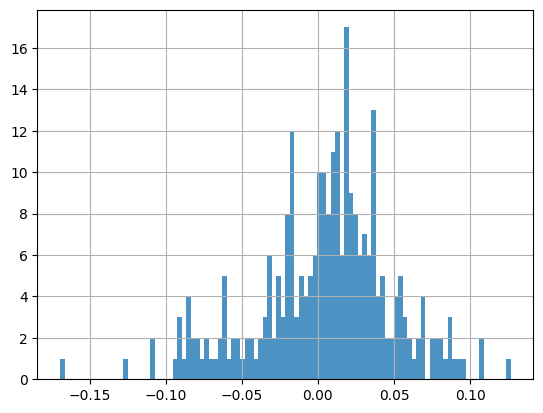

In [88]:
# Creo una tabla de distribucion de rendimiento mensual del activo.
sp_data['share_perfomance'].hist(bins = 100, alpha = 0.8)
plt.show()

Por medio del histograma obervamos valores atipicos como perdidas por debajo del -10% asi como aumentos del 10% mensual. Obviando estos valores, la distribucion muestra en su mayoria aumento de hasta el 5% mensual, sin embargo el activo tambien ha aumentado hasta un 10% pero no con la frecuenta que lo hace un 5%.

In [207]:
# Ahora cargo dataset de las principales empresas que conforman el SP500: Microsoft, Tesla, Alphabet y Apple
empresas = ['MSFT', 'AAPl', 'GOOG']

empresas= yf.download(empresas, start, end, interval= '1mo')

[*********************100%***********************]  3 of 3 completed


In [208]:
# Filtramos la fila necesaria

empresas_data = empresas['Adj Close']


In [209]:
# Agrego la columna de variacion porcentual
empresas_data['var_aapl'] = round(empresas_data['AAPL'].pct_change(), 2)
empresas_data['var_goog'] = round(empresas_data['GOOG'].pct_change(), 2)
empresas_data['var_msft'] = round(empresas_data['MSFT'].pct_change(), 2)

empresas_data.fillna(0, inplace= True)


C:\Users\gustg\AppData\Local\Temp\ipykernel_4132\2102387864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empresas_data['var_aapl'] = round(empresas_data['AAPL'].pct_change(), 2)
C:\Users\gustg\AppData\Local\Temp\ipykernel_4132\2102387864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empresas_data['var_goog'] = round(empresas_data['GOOG'].pct_change(), 2)
C:\Users\gustg\AppData\Local\Temp\ipykernel_4132\2102387864.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [210]:
empresas_data

,AAPL,GOOG,MSFT,var_aapl,var_goog,var_msft
Date,,,,,,
2000-01-01,0.788424,0.000000,30.532032,0.00,0.00,0.00
2000-02-01,0.871067,0.000000,27.880465,0.10,0.00,-0.09
2000-03-01,1.032076,0.000000,33.144585,0.18,0.00,0.19
2000-04-01,0.942784,0.000000,21.758455,-0.09,0.00,-0.34
2000-05-01,0.638339,0.000000,19.516319,-0.32,0.00,-0.10
...,...,...,...,...,...,...
2022-10-01,152.852676,94.660004,230.899323,0.11,-0.02,-0.00
2022-11-01,147.559540,101.449997,253.787338,-0.03,0.07,0.10
2022-12-01,129.731918,88.730003,239.220825,-0.12,-0.13,-0.06


<function matplotlib.pyplot.show(close=None, block=None)>

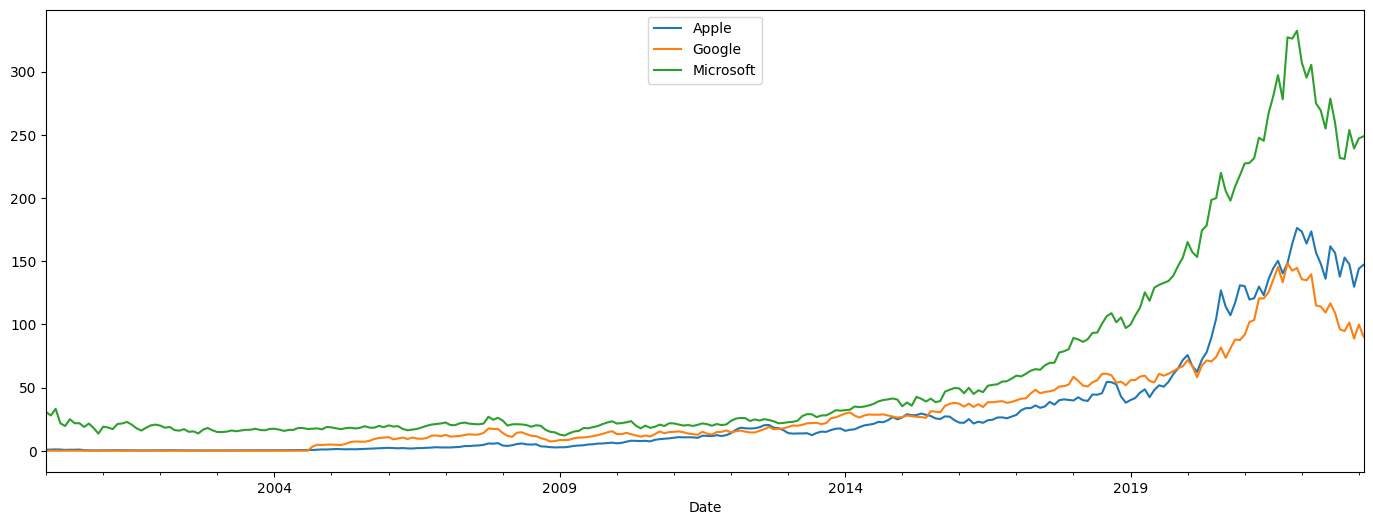

In [211]:
# Graficamos el precio historico de las empresas.
empresas_data['AAPL'].plot(figsize = (17,6), label= 'Apple' )
empresas_data['GOOG'].plot(label= 'Google')
empresas_data['MSFT'].plot(label= 'Microsoft')
leg = plt.legend(loc='upper center')
plt.show

Mediante la grafica de arriba, cocluimos que Microsoft es la empresa que presenta mayor precio de cierre en la historia.

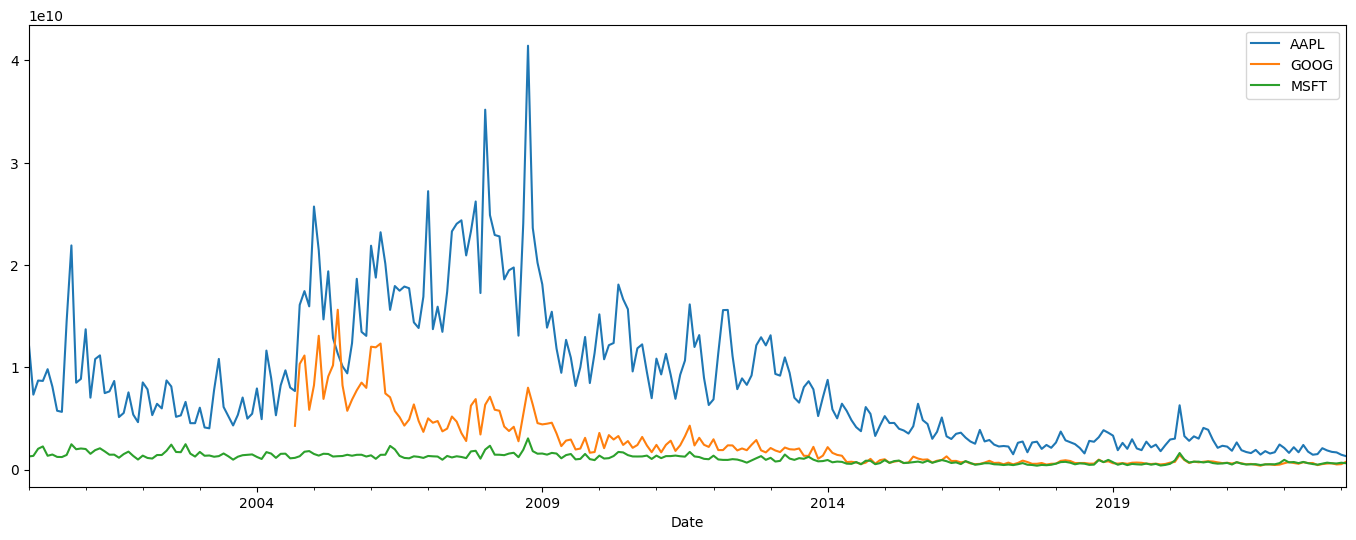

In [212]:
# Graficamos el volumen de negociacion de las empresas.
empresas['Volume'].plot(figsize = (17,6))
plt.show()

Mediante este grafico se puede decir que Apple tiene el volumen maximo de negociaciones.

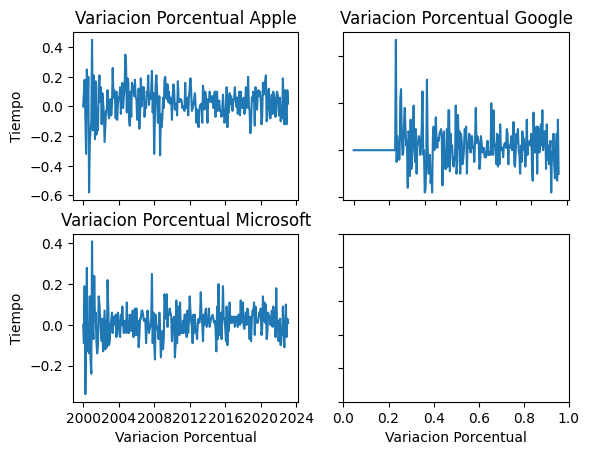

In [213]:
# Grafico la variacion del valor de las acciones 

fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(empresas_data['var_aapl'])
axs[0, 0].set_title('Variacion Porcentual Apple')
axs[0, 1].plot(empresas_data['var_goog'])
axs[0, 1].set_title('Variacion Porcentual Google')
axs[1, 0].plot(empresas_data['var_msft'])
axs[1, 0].set_title('Variacion Porcentual Microsoft')


for ax in axs.flat:
    ax.set(xlabel='Variacion Porcentual', ylabel='Tiempo')

for ax in axs.flat:
    ax.label_outer()

## Conclusiones

SP500 al ser un indice conformado por 500 empresas con mayor capital de Estados Unidos, esta presenta menor volatilidad y es menos riesgosa para invertir, sin embargo a pesar de mostrar un aumento luego de la pandemia hasta su precio maximo(4700$), actualmente el activo se encuentra consolidando y probando la zona de soporte de la media movil, adicional a eso, se prevee que para este año 2023 la FED aumente constantemente las tasas de interes, haciendo mas atrativo la compra de dinero cash, dificultando la obetencion de beneficias en la compra de activos de la bolsa, como sugerencia para invertir: recomiendo seguir observando el indice, hasta que presenta indicios de que pueda seguir con la tendencia alcista actual o si se dara inicio a una nueva caida, lo cual reduciria el riesgo de perdida al adquirir acciones a precios mas atractivos para las masas. Igualmente con las empresas (Apple, Google, Microsoft) sugiero mantener las mismas medidas, sin embargo, como enfoque sugiero diversificar la inversion entre Google y Apple ya que estos dos presenta mayor cantidad de variaciones positivas mensualmente.
